<a/ id='top'></a>
# Homework 2: Introduction to Probability and Simulation 
***

**Name**: Alex Thompson

***

This assignment is due on Moodle by **5 PM on Friday September 28**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected.
- Leave all of your code cells executed and the output displayed before submitting your final notebook. That way, we do not need to re-run all of the simulations, which can be time-consuming.
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5) | [Challenge!](#ch)

---

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)

### [20 points] Problem 1

To play a game, you have a bag containing 28 fair [four-sided dice](https://en.wikipedia.org/wiki/Four-sided_die), with faces `{1,2,3,4}`.  This bag also contains 10 fair six-sided dice (faces `{1,2,3,4,5,6}`) and 2 fair twenty-sided dice (faces `{1,2,3,4,...,19,20}`).  Call these 3 classes of die "Four", "Six" and "Twenty" (or F, S, and T, for short).  You grab one die at random from the box.  

Work the following problems by hand unless otherwise stated (but don't be afraid to simulate to check your result!). 

**Part A**: You roll your die one time.  What is the probability of the event $R_5$, that you roll a 5?  Include at least 4 decimal places in your answer.

$$
P(R_5) = P(R_5 \mid F)P(F) + P(R_5 \mid S)P(S) + P(R_5 \mid T)P(T)\\
= 0\cdot\frac{28}{40} + \frac{1}{6}\cdot\frac{10}{40} + \frac{1}{20}\cdot\frac{2}{20}
= \frac{10}{240} + \frac{2}{800}\\
= \frac{53}{1200}\\
\approx 0.0442
$$

**Part B**: Suppose you roll a 5.  What is the probability that the die you chose from the box is a Six-sided die? 

$$
P(S \mid R_5) = \frac{P(R_5 \mid S)P(S)}{P(R_5)}\\
=\frac{\frac{1}{6}\cdot\frac{10}{40}}{\frac{53}{1200}}\\
=\frac{\frac{10}{240}}{\frac{53}{1200}}\\
\approx 0.9434
$$

**Part C:**  Are the events $R_5$ and $S$ independent?  Justify your answer **using math**.

No, these events are not independent. A valid check for these events being independent would be $P(S \mid R_5) = P(S)$. However:

$$
P(S \mid R_5) \approx 0.9434 \neq 0.25 = P(S)
$$

**Part D:**  Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 5 or 6 you know you did *not* pick a Four-sided die, and if you roll a 7 or higher, you must have picked a Twenty-sided die.

But, if you roll $n$ times in a row and get only 1, 2, 3 or 4, you would have a stronger belief that you in fact grabbed one of the Four-sided dice.  Let $E_n$ be the event that you roll $n$ rolls of 1, 2, 3 or 4 in a row.  For example, one outcome in $E_3$ is the sequence 2, 3, 1.

Given that you roll a single value of 1, 2, 3 or 4, what is the probability that you have grabbed a Four-sided die?  That is, calculate **by hand** $P(F \mid E_1)$.

Given that $E_1 = (R_1, R_2, R_3, R_4)$, we want to find $P(F \mid E_1)$

$$
P(E_1) = P(R_1) + P(R_2) + P(R_3) + P(R_4)\\
P(R_1) = P(R_1 \mid F)P(F) + P(R_1 \mid S)P(S) + P(R_1 \mid T)P(T)\\
P(R_2) = P(R_2 \mid F)P(F) + P(R_2 \mid S)P(S) + P(R_2 \mid T)P(T)\\
P(R_3) = P(R_3 \mid F)P(F) + P(R_3 \mid S)P(S) + P(R_3 \mid T)P(T)\\
P(R_4) = P(R_4 \mid F)P(F) + P(R_4 \mid S)P(S) + P(R_4 \mid T)P(T)\\
$$

Since:
$$
P(R_1 \mid F) = P(R_2\mid F) = P(R_3 \mid F) = P(R_4 \mid F)\\
P(R_1 \mid S) = P(R_2\mid S) = P(R_3 \mid S) = P(R_4 \mid S)\\
P(R_1 \mid T) = P(R_2\mid T) = P(R_3 \mid T) = P(R_4 \mid T)\\
$$

combined with the fact that $P(F)$, $P(S)$, and $P(T)$, are constants:

$$
P(R_1) = P(R_2) = P(R_3) = P(R_4)
$$

Therefore:
$$
P(E_1) = 4P(R_1)\\
4(P(R_1 \mid F)P(F) + P(R_1 \mid S)P(S) + P(R_1 \mid T)P(T))\\
4(\frac{1}{4}\cdot\frac{28}{40} + \frac{1}{6}\cdot\frac{10}{40} + \frac{1}{20}\cdot\frac{2}{40})\\
4(\frac{28}{160} + \frac{10}{240} + \frac{2}{800})\\
4(\frac{263}{1200})\\
\frac{263}{300}
$$

Using Bayes' Rule:

$$
P(F \mid E_1) = \frac{P(E_1 \mid F)P(F)}{P(E_1)}
$$

$P(E_1 \mid F) = 1$ since if it is given the die is a 4-sided die, you have a 100% chance of rolling a 1, 2, 3, or 4. Therfore:

$$
P(F \mid E_1) = \frac{P(F)}{P(E_1)} = \frac{\frac{28}{40}}{\frac{263}{300}}  \approx 0.7985
$$

**Part E**:  

First, work out **by hand** a formula for the probability in general that you are rolling a Four-sided die, given that you have rolled $n$ values in a row that are 1, 2, 3 or 4 (that is, $E_n$).  So you want a formula for $P(F \mid E_n)$ in terms of $n$.

Then, define a function `prob_four` to calculate $P(F \mid E_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part D**.

Let's define event $X = (R_1, R_2, R_3, R_4)$.
$$
P(X) = P(R_1) + P(R_2) + P(R_3) + P(R_4)\\
P(X) = 4P(R_1) \text{  (See above in part D)}\\
P(X) = P(E_1)
$$

We have defined $E_n$ as $n$ dice rolls of $R_1, R_2, R_3$ or $R_4$. Again, using Bayes' Law:

$$
P(F \mid E_n) = \frac{P(E_n \mid F)P(F)}{P(E_n)}
$$

We know that $P(E_n \mid F) = 1$ since you have a 100% chance of rolling only 1's, 2's, 3's, or 4's on a 4-sided die regardless of how many times you roll the die. Therefore:
$$
P(F \mid E_n) = \frac{P(F)}{P(E_n)}
$$
We already know $P(F)=\frac{28}{40}$. $P(E_n) = P(X)^n$ since each die roll is independent of every other die roll. Substituting into the above equation:
$$
P(F \mid E_n) = \frac{P(F)}{P(E_n)} = \frac{\frac{28}{40}}{P(E_1)^n} = \frac{\frac{28}{40}}{(\frac{263}{300})^n} = \frac{7}{10(\frac{263}{300})^n}
$$

In [146]:
def prob_four(n):

    return 7/(10*(263/300)**n)
    
prob_four(1)

0.7984790874524714

**Part F:**  What is the smallest value of $n$ successive rolls of 1, 2, 3 or 4 that would make you believe that there's a better-than-95% chance that the die you grabbed is Four-sided?  Plugging larger and larger values for $n$ into your `prob_four` function is a very reasonable way to check this.

In [151]:
prob_four(3)

1.03894978777664

***
<a/ id='p2'></a>
[Back to top](#top)

### [20 points] Problem 2

Oscar and Stella are two average young adult octopuses. They work hard, but they also like to blow off a little steam after work. When they leave work from the CU Engineering Center ($E~$), they each head for one of five other locations: the Gym to get strong ($G~$), the Library to get learned ($L~$), the Boulder Reservoir to have a nice swim ($R$), the Hill to have a sandwich ($H~$), or to Brewing Market to have a nice Coffee ($C~$).  

Here are some rules governing their movements throughout the fair city of Boulder:
* When Oscar and/or Stella is leaving one location, they randomly select one of the available adjacent locations, with equal probability.
* This includes back-tracking, but note that to return to their original location would require 2 moves.
* Assume that all moves require the same amount of time.
* They are also not allowed to stay put; they always must move to some *other* adjacent location.
* Oscar and Stella, being the think-for-yourselfers that they are, also act **independently** of one another. That is, the probability that Oscar goes from one place to another is independent of the probability of Stella's movements.
* As we learned from your answers to Problem 5 of Homework 1, Stella and Oscar of course prefer to *walk* from place to place, as opposed to swim... because one of an octopus' *three* hearts will stop beating when it swims. Yowza!

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/chris_and_dan_statespace.png" style="width: 300px;"/>

**Part A**: Oscar, being a learned octopus, wants to go to the library, but also wants to make a stop somewhere else first, for he has octopus errands to run. Compute (by hand) the probability that Oscar ends up at the the Library ($L$) after first visiting one other location, after he is initially at the Engineering Center ($E$). 

When looking at the the paths Oscar could take in which he visits only a single location prior, he can only arrive at the Library $(L)$ from the gym $(G)$ or the Brewing Market $(C)$. We are therefore interested in the probability he arrives at the Library given he is at the gym, $P(L \mid G)$, and the probability he arrives at the Library given he is at the Brewing Market, $P(L \mid C)$. Specifically, we are interested in the sum $P(L \mid G) + P(L \mid C)$ since we are interested in the probability of either of these events happening:
$$
P(L \mid G) + P(L \mid C)\\
\frac{P(G \mid L)P(L)}{P(G)} + \frac{P(C \mid L)P(L)}{P(C)}\\
$$
Since $P(L)=P(G)=P(C)$ if Oscar is starting at the Engineering Center:

$$
P(G \mid L) + P(C \mid L)\\
\frac{1}{4} + \frac{1}{4}\\
\frac{1}{2} = 0.5\\
$$

**Part B**: Stella, on the other tentacle, is a body-building octopus. This is quite the feat given her lack of bones! Compute (by hand) the probability that Stella ends up at the Gym _either_ as her first _or_ second location visited after leaving the Reservsoir. (Again, assume that Stella wanders the streets of Boulder randomly using the same rules described above.)

We are interested in $P(G)$ and $P(G \mid E)$ as these are the paths that take her to the Gym as her first and second locations respectively. $P(G) = \frac{1}{2}$ assuming she is leaving from the reservoir. 

$$
P(G \mid E) = \frac{P(E \mid G)P(G)}{P(E)}
$$

Since she is leaving from the reservoir, $P(G)=P(E)$. Therefore:

$$
P(G \mid E) = P(E \mid G) = \frac{1}{4}    \text{(Probability she arrives at the Engineering Center from the Gym)}\\
P(G) + P(G \mid E) = \frac{1}{2} + \frac{1}{4} = \frac{3}{4} = 0.75
$$

**Part C**: Suppose that Oscar works late at the Engineering Center, while Stella goes to the Hill.  Later, they both leave and wander around, randomly and independently of one another, as described above.
1. What is the probability that they run into each other in the same location on the first location visited?  
2. Given their two initial locations, what is the probability that they meet at the Hill after 2 moves?

1.) We are only interested in the first locations Oscar and Stella can visit from their initial locations. For Stella, she can visit the Gym, Library, and Brewing Market as her first locations. For Oscar, there is the Reservoir, Gym, Library, and Brewing Market. The probabilities of them making it to these locations are:
$$
P(G_S) = P(L_S) = P(C_S) = \frac{1}{3}\\
P(R_O) = P(G_O) = P(L_O) = P(C_O) = \frac{1}{4}
$$

The only way they can both arrive at the same first location is by them both arriving at the Gym, Library, or Brewing Market. We are interested in the probability that they both arrive at one of those locations:

$$
P(G_S \cap G_O) + P(L_S \cap L_O) + P(C_S \cap C_O)
$$

Since Oscar and Stella move independently of one another, we can multiply the probabilities of the individual events happening to compute the above expression:

$$
P(G_S \cap G_O) + P(L_S \cap L_O) + P(C_S \cap C_O) = P(G_S)P(G_O) + P(L_S)P(L_O) + P(C_S)P(C_O)\\
=(\frac{1}{3}\cdot\frac{1}{4}) + (\frac{1}{3}\cdot\frac{1}{4}) + (\frac{1}{3}\cdot\frac{1}{4})\\
\frac{3}{12} = \frac{1}{4} = 0.25
$$

2.) Since Stella initially starts on the Hill, she will always be moving backwards after her first move if she is to end up back on the Hill for her second location. She can only accomplish this by moving to the Gym, Library, or Brewing Market. The probabilities of her moving back to the Hill after first visiting any of these locations are:
$$
P(G)P(H \mid G) = \frac{1}{3}\cdot\frac{1}{4} = \frac{1}{12}\\
P(L)P(H \mid L) = \frac{1}{3}\cdot\frac{1}{4} = \frac{1}{12}\\
P(C)P(H \mid C) = \frac{1}{3}\cdot\frac{1}{3} = \frac{1}{9}\\
$$

Summing these together indicates that she has a total probability of moving back to the Hill as her second location of $\frac{5}{18}$.

If Oscar is to make it to the Hill for his second location, he also has to pass through either Gym, Library, or Brewing Market for his first move, and then move from that respective location to the Hill. The probabilities of him making such movements are:
$$
P(G)P(H \mid G) = \frac{1}{4}\cdot\frac{1}{4} = \frac{1}{16}\\
P(L)P(H \mid L) = \frac{1}{4}\cdot\frac{1}{4} = \frac{1}{16}\\
P(C)P(H \mid C) = \frac{1}{4}\cdot\frac{1}{3} = \frac{1}{12}\\
$$

Summing these together indicates that he has a total probability of making it to the Hill in exactly 2 moves is $\frac{5}{24}$.

We are interested in the scenarios in which both Oscar and Stella make it to the Hill in exactly 2 moves. This means looking for the probability of the intersection of both of these events happening. Again, since they move independently of each other, we can multiply their respective probabilities together:

$$
P(H_{S2} \cap H_{O2}) = P(H_{S2})P(H_{O2}) = \frac{5}{18}\cdot\frac{5}{24} = \frac{25}{432} \approx 0.0579
$$

**Part D**: Write a simulation to confirm that your by-hand calculations in **Part A**, **Part B**, and **Part C** are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Part A**, **Part B**, and **Part C**.  

In [145]:
dfCampus = pd.DataFrame({"Location":['H','G','L','C','R','E'],
                         "Adj Locations":[['G','L','C'],
                                          ['H','L','E','R'],
                                          ['H','G','E','C'],
                                          ['H','L','E'],
                                          ['G','E'],
                                          ['C','L','G','R']]}, columns=["Location","Adj Locations"])

#test = np.random.choice(
myAdj = dfCampus.loc[dfCampus["Location"] == "H"]["Adj Locations"]
print(myAdj)
print(myAdj[0][1])
dfCampus

0    [G, L, C]
Name: Adj Locations, dtype: object
L


,Location,Adj Locations
0,H,"[G, L, C]"
1,G,"[H, L, E, R]"
2,L,"[H, G, E, C]"
3,C,"[H, L, E]"
4,R,"[G, E]"
5,E,"[C, L, G, R]"


***
<a/ id='p3'></a>
[Back to top](#top)

### [20 points] Problem 3  

As part of their Computer Science Jedi training, Tony and Dan are having a lightsaber duel. The rules of the lightsaber duel are as follows:
* The duel is composed of a number of rounds.
* Each round consists of Tony practicing his sweetest Jedi moves and trying to strike Dan, then Dan practicing *his* best moves and trying to strike Tony.
* If Tony manages to strike Dan, then Tony is awarded a point, and similarly if Dan manages to strike Tony, then Dan is awarded a point.
* If a round ends in a tie, then Tony and Dan proceed to another round. If a round ends with one Jedi scoring a point but the other one does not, then the Jedi who scored a point wins the duel.

Let $T$ be the event that "Tony wins the duel", $E$ be the event that "the duel ends after the first round of lightsaber strikes", and $C$ be the event that "the duel continues after the first round of lightsaber strikes".  Suppose that the result of one lightsaber strike is independent of the other strikes, Tony successfully lands his lightsaber strikes with probability $p$, and Dan lands his strikes with probability $q$.

the**Part A**: The duel will continue until Tony or Dan wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual lightsaber strikes by $H$ for a hit and $M$ for a miss, and assume that Tony has the first strike in each round. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds.

The sample space is the set of all duels comprised of any number of rounds in which exists a single round where either Dan or Tony wins. This set if infinitely large since you can continue indefinitely without having a winner. The possible outcomes for duels containing one or two rounds are shown below:

-single round outcomes: [(H,M)], [(M,H)]  
-double round outcomes: [(M,M), (M,H)], [(M,M), (H,M)], [(H,H), (M,H)], [(H,H), (H,M)]

Rounds are contained within sets of parenthesis and complete duels are contained within sets of brackets.

**Part B**: Determine $P(T \mid E)$ in terms of $p$ and $q$.

We are looking for the probability that Tony won the duel given that it ended after the first round. This means that only a single round ocurred and we want the probability that Tony won that round. For him to have won, he needed to successfully land a strike with probability $p$ while simultaneously, Dan had to miss his strike with probability $1-q$. Since strikes are independent of each other, we can multiply these together for the desired probability:
$$
P(T \mid E) = p(1-q)
$$

**Part C**: Explain why events $C$ and $T$ are independent. 

$C$ and $T$ are independent because of they have no influence or bearing on the probabilities of each other. Tony winning a duel doesn't change the liklihood that the duel lasted a single round or a number of rounds past the first. Similarly, if we know in which round the duel ended, it doesn't change the liklihood of either Dan or Tony winning the overall duel. In mathematical terms, this means:
$$
P(T \mid C) = P(T)\\
P(C \mid T) = P(C)\\
$$

These conditions are both valid tests for whether or not two events are independent of one another.

**Part D**: Use the Law of Total Probability to show that $P(T) = p(1-q) + (2pq - p - q +1) P(T \mid C)$. 

**Part E**: Use the fact from **Part C** that $P(T \mid C) = P(T)$ to determine $P(T)$ in terms of $p$ and $q$. 

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

**Part G**: Explain the significance of the solution technique for $P(T)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(T)$ directly?  Can we always use such techniques?  What assumption did we need to make in order to use this solution approach?

***
<a/ id='p4'></a>
[Back to top](#top)

### [20 points] Problem 4

In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of [Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game)).  The game consists of a round board with 40 "squares" numbered from $0$ to $39$, where squares $0$ and would-be $40$ are [coincident](https://en.wikipedia.org/wiki/Coincident) and called **GO**.  A player starts on **GO** with \$200 in their pocket.  On each turn the player rolls a pair of dice and then moves a number of spaces equal to the sum of the dice.  Landing on different squares have different results: 

- Squares 2, 7, 17, 22, 33, and 36 cause you to draw a card.  The cards tell you to collect \$50, \$100 or \$200, or pay the bank \$50 or \$100.  There is always an equal probability associated with each of these possible cards.

<p> </p>

- Squares 0, 10, and 20 do not trigger any action 

<p> </p>

- Square 30 is **Go To Jail**, which sends the player directly to **Jail** and ends the turn 

<p> </p>

- If a player starts a turn from **Jail** she rolls two dice: 

    - If the player rolls doubles (i.e. the dice have equal values) the player moves from Square 10 a number of squares equal to the sum of the dice
    
    - If the player rolls anything other than doubles she pays the bank \$20 and remains in **Jail** 
    
<p> </p>

- If the player passes or lands on **GO** she collects \$200. 

<p> </p>

- If the player lands on any other square not mentioned above, she pays the bank an amount equal to the square's number (e.g. if she lands on Square 29 she pays the bank \$29). 

<p> </p>

If at any point the player has \$0 or less they go bankrupt and the game ends.

See [here](http://www.cs.colorado.edu/~tonyewong/home/resources/miniopoly_example.png) for an example of the Miniopoly board layout.

<br>

**Part A**: Complete the function miniopoly_turn below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.  

In [104]:
def miniopoly_turn(location, cash):
    
    if (cash == 0):
        return (location,cash)
    
    # your code goes here!
    die = np.array([1,2,3,4,5,6])
    cardSpaces = np.array([2,7,17,22,33,36])
    noAct = np.array([1,10,20])
    jail = 30
    cards = np.array([50,100,200,-50,-100])
    
    roll1 = np.random.choice(die)
    roll2 = np.random.choice(die)
    
    # first check to see if player is starting the turn in jail and making the appropriate changes according to rules
    
    if (location == jail):
        if (roll1 == roll2):       # the two rolls match (doubles) and they can escape. update location and cash accordingly
            location = 10 + roll1 + roll2
            if location in cardSpaces:
                cash += np.random.choice(cards)
            elif ((location not in noAct) & (location not in cardSpaces)):
                cash -= location
        else:     # two rolls don't match and player has to remain in jail while losing $20
            cash -= 20
            
    # if player doesn't start in jail, they adjust their location accordingly based on the roll
    
    else:
        location += (roll1 + roll2)
        
        # add $200 if player passes Go and adjust their location so that it is still a valid location on the board
        if (location >= 40):
            location -= 40
            cash +=200
            
        # player goes to jail if their new location is on space 30. Their cash is not changed
        if (location == 30):
            location = jail
            
        # player's cash is adjusted based on card draw if they land on a card Space
        elif (location in cardSpaces):
            cash += np.random.choice(cards)
            
        # player's cash is adjusted based on their new location which is not a "No Action" space, nor a card draw space, nor 30
        elif ((location not in noAct) & (location not in cardSpaces) & (location != 30)):
            cash -= location
    
    # if player's cash is negative, adjust it so they have zero cash instead
    if (cash < 0):
        cash = 0
            
    return location, cash

**Part B**: Use your function from **Part A** to Simulate at least 5000 30-turn games of Miniopoly and make a frequency histogram of the player's cash at the end of the game. 

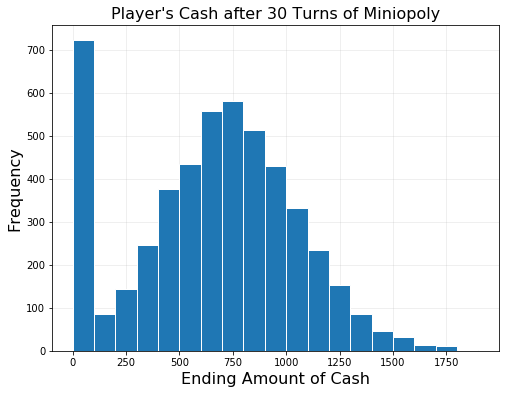

In [127]:
def playGame(loc, cash, numTurns):
    bankrupt = False
    jailTime = False
    for i in range(numTurns):
        (loc, cash) = miniopoly_turn(loc, cash)
        if (loc == 30):
            jailTime = True
    
    return loc, cash, jailTime

games = []
for i in range(5000):
    result = playGame(0,200,30)
    games.append(result)

    
cashResults = np.zeros(5000)
for i in range(len(cashResults)):
    cashResults[i] = games[i][1]

JTResults = np.zeros(5000)
for i in range(len(JTResults)):
    if (games[i][2] == True):
        JTResults[i] = 1
    elif (games[i][2] == False):
        JTResults[i] = 0
    
fig,ax = plt.subplots(1,1,figsize=(8,6))
mybins = range(0,2000,100)
ax.hist(cashResults, edgecolor='white', bins=mybins)
ax.set_title("Player's Cash after 30 Turns of Miniopoly", fontsize=16)
ax.set_xlabel("Ending Amount of Cash", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)

**Part C**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns of the game. 

In [106]:
numbBR = 0

for i in range(len(cashResults)):
    if (cashResults[i] == 0):
        numbBR += 1
        
pBR = numbBR/len(cashResults)

print(pBR)
    

0.1358


A rough estimate that a player goes bankrupt within the first 30 turns of the game is 0.1358.

**Part D**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns _given_ that they went to **Jail** at least once.  Is a player more or less likely to go bankrupt if they've been to **Jail**?  

In [107]:
numbJT = np.sum(JTResults)
pJT = numbJT/len(JTResults)
print(pJT)

numbJTBR = 0
for i in range(len(games)):
    if (games[i][1] == 0):
        if (games[i][2] == True):
            numbJTBR += 1
            
pJTBR = numbJTBR/numbBR
print(pJTBR)


0.5214
0.7422680412371134


Let's denote the event that a player went Bankrupt in the first 30 turns as $BR$ and the event that a player went to Jail at least once as $JT$. We are therefore looking for:
$$
P(BR \mid JT) = \frac{P(JT \mid BR)P(BR)}{P(JT)}
$$
We already calculated a rough estimate of $P(BR)$ in part C. In the above python code, we calcualted an estimate for $P(JT)$, represented by the result "pJT" by dividing the number of instances of jailtime by the total number of games. The code below it is an estimate of $P(JT \mid BR)$, the probability that a player went to Jail at least once give that they went Bankrupt. We estimated this by summing the total number of games in which the player was both bankrupt and experienced jailtime and then dividing this by the total number of games in which the player went bankrupt. This estimate is represented by the value "pJTBR." We then plug all of these values into the above equation for a rough estimate of the probability a player goes bankrupt in 30 turns given they went to Jail at least once:
$$
P(BR \mid JT) = \frac{P(JT \mid BR)P(BR)}{P(JT)} = \frac{pJTBR*pBR}{pJT}
$$

The exact estimate is shown in the below python code, represented by the value pBRJT:

In [108]:
pBRJT = (pJTBR*pBR)/pJT
print(pBRJT)

0.19332566168


This suggests that a player is more likely to go bankrupt in 30 turns if they have been to Jail.

**Part E**: Use your code from **Part A** to estimate the probability (either directly or using Bayes' Rule) that a player has gone to jail at least once, given that the player went bankrupt in the first 30 turns.

This question is looking for the probability $P(JT \mid BR)$. I belive I already calculated this value by accident in part D represented by the python value "pJTBR." The method above is using direct calculation from the data. However, Bayes' Rule confirms this result. The probability is roughly 0.7423.

I find this kind of funny. lol

***
<a/ id='p5'></a>
[Back to top](#top)

### [20 points] Problem 5

Suppose you roll two fair six-sided dice.  Let $C$ be the event that the two rolls are _close_ to one another in value, in the sense that they're either equal or differ by only 1.  

**Part A**: Compute $P(C)$ by hand. 


\begin{bmatrix}
     {\color{red}{1,1}} & {\color{red}{1,2}} & 1,3 & 1,4 & 1,5 & 1,6\\
     {\color{red}{2,1}} & {\color{red}{2,2}} & {\color{red}{2,3}} & 2,4 & 2,5 & 2,6\\
     3,1 & {\color{red}{3,2}} & {\color{red}{3,3}} & {\color{red}{3,4}} & 3,5 & 3,6\\
     4,1 & 4,2 & {\color{red}{4,3}} & {\color{red}{4,4}} & {\color{red}{4,5}} & 4,6\\
     5,1 & 5,2 & 5,3 & {\color{red}{5,4}} & {\color{red}{5,5}} & {\color{red}{5,6}}\\
     6,1 & 6,2 & 6,3 & 6,4 & {\color{red}{6,5}} & {\color{red}{6,6}}\\
\end{bmatrix}

All 36 potential outcomes of rolling two fair six-sided dice are shown above. The outcomes highlighted in red are those that are part of event C in which the two die are close to one another. There are 16 of them. Therefore:
$$
P(C) = \frac{16}{36} = \frac{4}{9} = 0.\overline{4444}
$$

**Part B**: Write a simulation to run many trials (at least 10,000) of the pair of rolls and estimate the value of $P(C)$ you calculated in **Part A**.  Does your estimate agree with the exact calculation you did in **Part A**?  If not, try increasing the number of trials in your simulation. 

0.44635


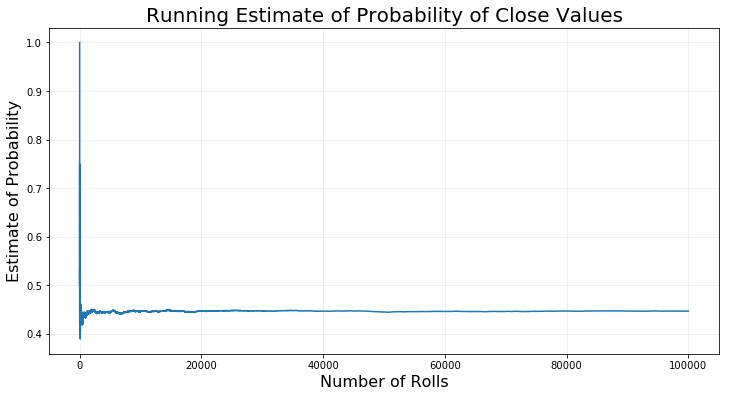

In [115]:
die = np.array([1,2,3,4,5,6])
numRolls = 100000

rolls1 = np.random.choice(die, size=numRolls)        # Taken from notebook 4 on stochastic simulation
rolls2 = np.random.choice(die, size=numRolls)        #

p = np.zeros(numRolls)
for ii in range(numRolls):
    p[ii] = np.sum(abs(rolls1[:ii+1] - rolls2[:ii+1]) <= 1) / (ii+1)
    
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(p)
ax.set_title("Running Estimate of Probability of Close Values", fontsize=20)
ax.set_xlabel("Number of Rolls", fontsize=16)
ax.set_ylabel("Estimate of Probability", fontsize=16)
ax.grid(True, alpha=0.25)

print(p[-1])


The simulation estimated the probability that the rolled values would be close to one another is 0.44635 after rolling the dice 100,000 times. This differed slightly from the predicted probability at 10,000 or 50,000 simulations. However it is reasonably close. The accuracy could be improved by adding more rolls, but this greatly increases the time required to perform the total simulation. 100,000 times seemed reasonable.

**Part C**: In the in-class notebook associated with Lecture 4 (nb04) we plotted a running estimate of the probability of an event as a function of the number of trials in our simulation.  Write code to run at least 10 independent simulations of at least 50,000 trials each to estimate $P(C)$ and plot their running estimate curves on the same set of axes. **Hint**: This is a lot of computation, so try to leverage Numpy as much as possible so that your code doesn't run forever. 

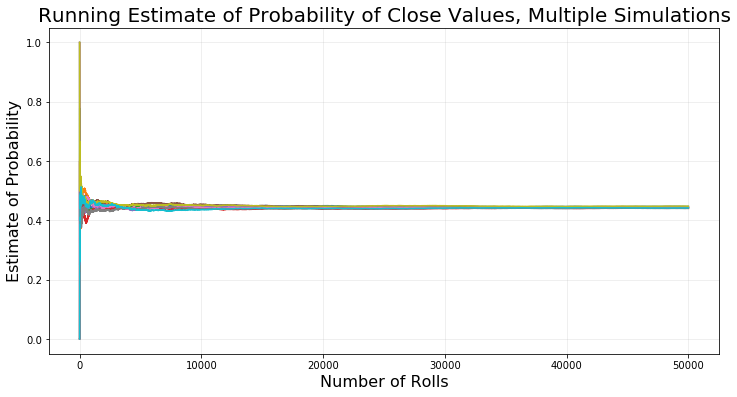

In [120]:
fig, ax = plt.subplots(figsize=(12,6))
numSims = 10
numRolls = 50000
for i in range(numSims):
    rolls1 = np.random.choice(die, size=numRolls)
    rolls2 = np.random.choice(die, size=numRolls)
    p = np.zeros(numRolls)
    for ii in range(numRolls):
        p[ii] = np.sum(abs(rolls1[:ii+1] - rolls2[:ii+1]) <= 1) / (ii+1)
    ax.plot(p)
    
ax.set_title("Running Estimate of Probability of Close Values, Multiple Simulations", fontsize=20)
ax.set_xlabel("Number of Rolls", fontsize=16)
ax.set_ylabel("Estimate of Probability", fontsize=16)
ax.grid(True, alpha=0.25)

**Part D**: Comment on the behavior of the running estimates as the number of trials increases. 

The running estimates become increasingly stable as the number of trials increase. There is less and less fluctuation. While the estimate continues to approach the true value of the probability, it will never quite reach it. However, this behavior is not necessarily asymptotic as there is always the possibility of highly unprobably behavior occuring and skewing the value of the estimation up or down away from the true value.

***
<a/ id='ch'></a>
[Back to top](#top)

### Challenge Problem - Night Falls. A Storm Rolls In. Can You Cross The River?

In every homework assignment we'll give you a Challenge Problem.  Challenge Problems never need to be turned in (and in fact, will not be graded) but we encourage you to give them a shot (after completing the required homework problems) and discuss them with your classmates and your instructors. 

This Challenge Problem was a [Riddler](https://fivethirtyeight.com/tag/the-riddler/) on [FiveThirtyEight](https://fivethirtyeight.com) a few years back. 

You’re on the north shore of a river, and want to cross to the south, via a series of 13 bridges and six islands, which you can see in the diagram below. But, as you approach the water, night falls, a bad storm rolls in, and you’re forced to wait until morning to try to cross. Overnight, the storm could render some of the bridges unusable — it has a 50 percent chance of knocking out each of the bridges. (The chance is independent for each bridge.)

<br>

![alt text](https://espnfivethirtyeight.files.wordpress.com/2016/01/roeder-riddler-diagram-11.png?w=575&h=449&quality=90&strip=info)

<br>

What’s the probability you will be able to cross the river in the morning? (You have no boat, can’t swim, can’t fix the bridges, etc. No tricks.)